<a href="https://colab.research.google.com/github/Helzheng123/datasci_6_regression/blob/main/datasci_6_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading in packages

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading in Maternal Health Risk Dataset

In [ ]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


# **Simple Linear Regression**

### Variables:
Independent Variable = Age

Dependent Variable = BS (Blood Sugar (mmol/L))

In [ ]:
# extracting data for regression
X = sm.add_constant(df['Age'])  # Adds a constant term to the predictor # Age is the independent variable so we place it with X

# fit the regression model
model = sm.OLS(df['BS'], X) # BS is our dependent variable so we place it where y would be
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     BS   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     292.1
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           9.85e-58
Time:                        00:24:33   Log-Likelihood:                -2518.4
No. Observations:                1014   AIC:                             5041.
Df Residuals:                    1012   BIC:                             5051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2703      0.222     23.763      0.0

### **Insights:** The R square value for the regression model is 0.224 (adjusted is 0.223). Since the R square value is closer to 0, this indicates that the independent variable (Age) was ***not a strong factor/predictor*** for blood sugar levels. This value also shows that only 22.4% of the variance in Blood Sugar can be explained by the variation in Age. Thus the relationship between age and blood sugar levels is ***very weak*** and shows that this model is not a strong predictor of blood sugar.

In [ ]:
# linear regression analysis using statsmodels
# residuals are the differences between the observed values and the predicted values by the regression model (the errors in your model and how well your model fits the data)
# fitted values are the predicted values/ best fit

residuals = results.resid
fitted = results.fittedvalues

## Checking Assumptions

In [ ]:
# assess linearity of the relationship by performing the Rainbow test
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=1.0802893708969694, p-value=0.19269939779773237


### **Insights:** since the p-value is 0.19, this is greater than the significance level, which suggests that there is ***no strong evidence against linear assumption***. This linear regression model can be a reasonable fit for the data.

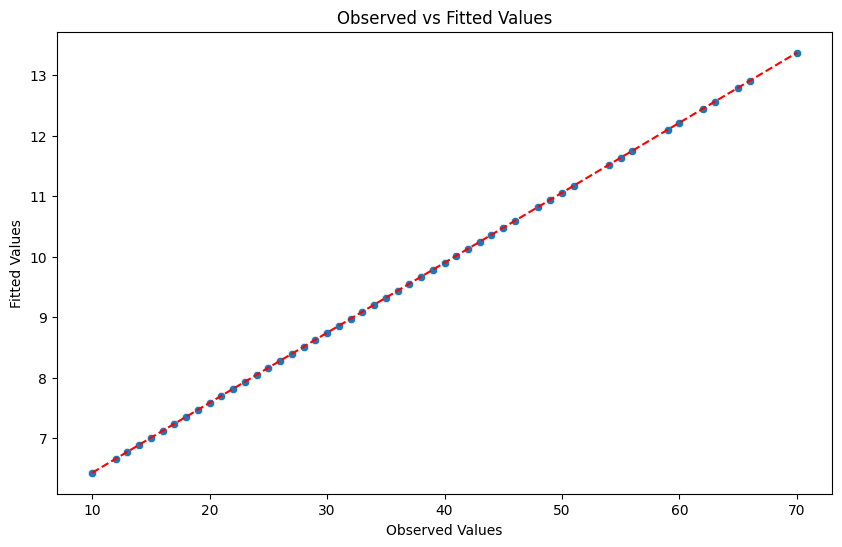

In [ ]:
# plot observed vs fitted values

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['Age']), max(df['Age'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()

In [42]:
# Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.8850183486938477, p-value=9.105725902840898e-27


### **Insights:** The Shapiro Wilk Test came out to be a p-value of 9.11e-27, which is lower than 0.05. This shows that the residuals ***do not have a normal distribution***. The data deviates significantly from a normal distribution.

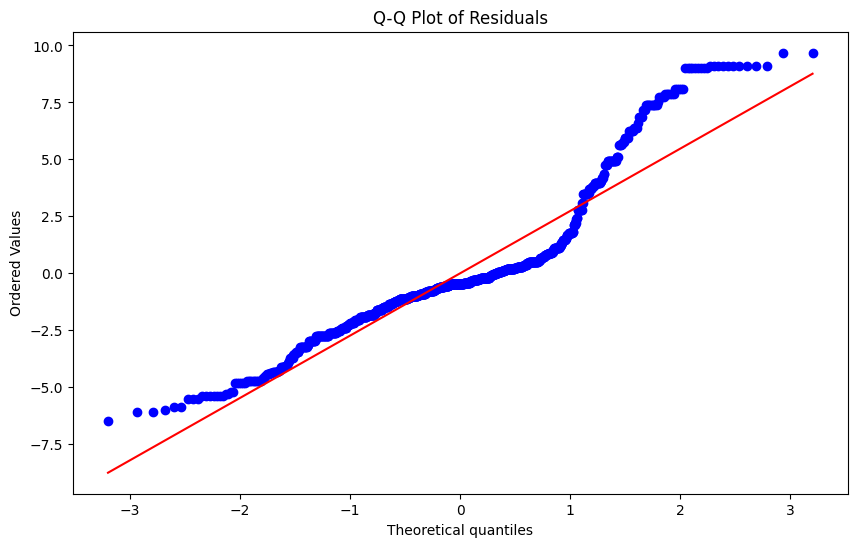

In [ ]:
# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [ ]:
# Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=0.8091355026247073, p-value=0.9912560933343519


## Multiple Linear Regression

### Variables:

IV: Age, Diastolic Blood Pressure, Blood Sugar, Body Temperature, Heart Rate

DV: Systolic Blood Pressure

In [ ]:
residuals = results.resid
fitted = results.fittedvalues

In [ ]:
X = df[['BodyTemp', 'Age', 'BS', 'DiastolicBP', 'HeartRate']]
X = sm.add_constant(X)
y = df['SystolicBP']

model = sm.OLS(y, X)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             SystolicBP   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     360.8
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          1.21e-221
Time:                        00:06:50   Log-Likelihood:                -3871.5
No. Observations:                1014   AIC:                             7755.
Df Residuals:                    1008   BIC:                             7785.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         137.8030     26.898      5.123      

In [ ]:
# Checking multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data:")
print(vif_data)


VIF Data:
      Variable          VIF
0        const  6012.699203
1     BodyTemp     1.121632
2          Age     1.428679
3           BS     1.446578
4  DiastolicBP     1.362384
5    HeartRate     1.048250


In [ ]:
### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=0.9388091204737412, p-value=0.760706762558816


In [ ]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.8850183486938477, p-value=9.105725902840898e-27


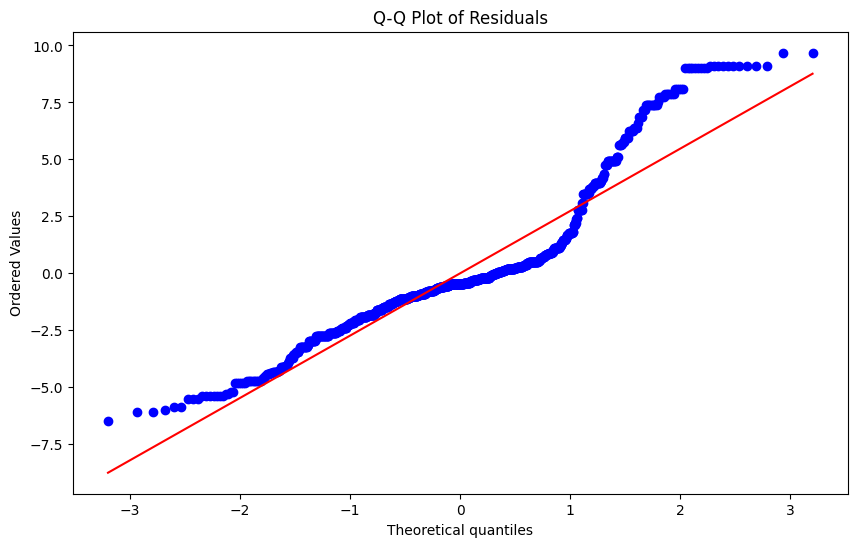

In [ ]:
# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [ ]:
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=1.2304191561841724, p-value=0.01024135823876125
